In [4]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai_client import OpenAIClient
from IPython.core.interactiveshell import InteractiveShell

In [5]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [18]:
products_json = json.load(open('data/final_products_data.json'))

In [19]:
products_df = pd.DataFrame(products_json["products"][0].items(), columns=["id", "raw_data"])
products_df["raw_length"] = products_df["raw_data"].apply(lambda x: len(x.split()))

In [8]:
products_df.tail(3).values

array([['WAFER-ULT5-i3-R10',
        'w w w e w r l c Single Board Computer Embedded Board SBC supports Intel th Generation Whiskey Lake processor DDR SODIMM Triple display dual HDMI LVDS Triple GbE USB Gen M A key mPCIe mSATA support SATA Gbs COM RoHS SoC th generation Intel mobile ULT Processor Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Dualcore MB cache TDPW Intel Celeron processor UE GHz Dualcore MB cache TDPW Intel Celeron processor U GHz Dualcore MB cache TDPW BIOS AMI UEFI BIOS Memory x DDR MHz SODIMM support GB Graphics Engine Intel UHD Graphics Display Output Triple Independent Displays x HDMI xHz x LVDS bit dualchannel LVDS CHB DP LVDS converter xHz Ethernet x Intel IAT colay I x PCIe GbE LAN Intel Controller Embedded Controller ITE ITVGFX External IO Interface x USB Gen Internal IO Interface x RS x pin P x RS x pin P Support Auto Flow Control RS x SATA Gs V SATA power connector x USB x pin P IC x IC x pi

In [9]:
# create a distribution of the raw data length
products_df["raw_length"].describe()

count     4127.00
mean      2543.96
std      16013.38
min          0.00
25%        558.00
50%        756.00
75%       1153.00
max     493591.00
Name: raw_length, dtype: float64

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Raw Data Length')

<Axes: title={'center': 'Distribution of Raw Data Length'}, xlabel='raw_length', ylabel='Count'>

Text(0.5, 0, 'Raw Data Length')

Text(0, 0.5, 'Count')

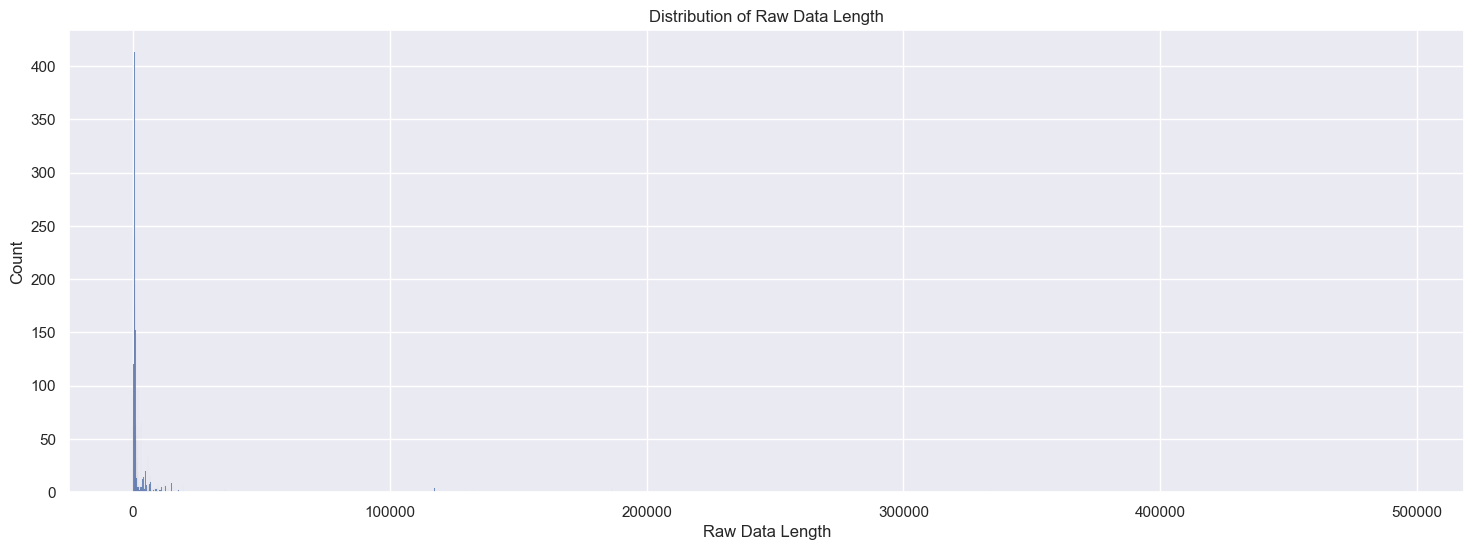

In [22]:
plt.figure(figsize=(18, 6))  # Increase width and height
plt.title("Distribution of Raw Data Length")  # Add a title
sns.histplot(products_df["raw_length"], edgecolor='black')  # Use histplot instead of displot
plt.xlabel("Raw Data Length")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.show()

In [11]:
products_df[products_df["raw_length"] < 250].shape

(172, 3)

In [12]:
products_df[products_df["raw_length"] < 250].tail(3)

,id,raw_data,raw_length
4028,SB02-4940-0000-C1,DatasheetUDOO XII Main cloud services UDOO BRICKS UDOO BLU Arduino Leonardocompatible II II LEONARDO BIT Optional Depends version Development platform ARDUINO LEONARDOCOMPATIBLEII GB DDRL DUAL CHANNEL Gigabit Ethernet LAN interface M Key E slot optional Wireless modules x HDMI x mini DP RC IR interface mm x mm inch x inch Intel HD Graphics Up MHz execution units NETWORKING USB SATA connector M Key B SSD Slot Micro SD card slot VIDEO INTERFACE GRAPHICS MULTIMEDIA AUDIO IR OTHER INTERFACES OPERATING SYSTEM DIMENSIONS PROCESSOR CORES MEMORY FEATURES Arduino Leonardo Microcontroller GHZ INTEL PENTIUM N UDOO X UDOO X GHZ INTEL CELERON N GB DDRL DUAL CHANNEL GB GB MASS STORAGE Intel HD Graphics Up MHz execution units HD audio codec ALC CG MicrophoneHeadphone combo connector Preamplified speaker output SPDIF output HW Video decode HHEVC H MPEG MVC VC WMV JPEG VP VP HW Video encode H MVC JPEG Up GPIOs x IC x UART LPC SDIO Touch Screen signals external pin headers The communication Braswell SoC ATmegaU Microcontroller goes internal USB interface like Arduino Leonardo boards connect external PCs V compliant x USB typeA sockets ATmegaU UART x iC x SPI Arduino Leonardocompatible Up x digital IO PWM x Analog input Microcontroller Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information UDOO SBC SBC SBC SBC httpswwwmousercomudoo httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC,222
4035,SC0563,Allegro ZHeight ZHeight ZHeight ZHeight ZHeight Z He ig ht Z He ig ht Z He ig ht Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information Raspberry Pi SC httpswwwmousercomraspberrypi httpswwwmousercomaccesspnSC,34
4062,uATX-RYZEN,uATXSeriesDatasheetindd Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information GIGAIPC uATXRYZEN httpswwwmousercomgigaipc httpswwwmousercomaccesspnuATXRYZEN,16


In [14]:
products_df[products_df["raw_length"] > 2500].shape

(367, 3)

In [15]:
products_df = products_df[products_df["raw_length"] > 250]
products_df = products_df[products_df["raw_length"] < 2500]

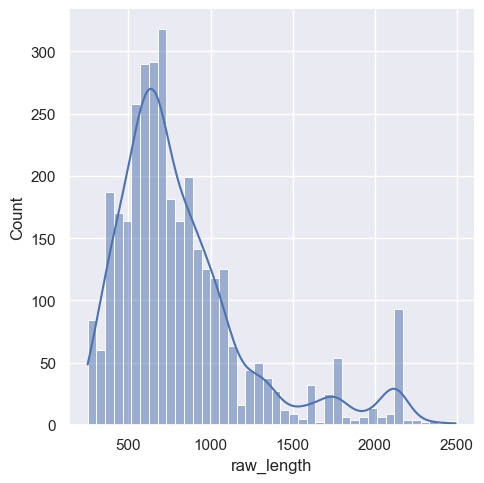

In [16]:
sns.displot(products_df["raw_length"], kde=True)

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3434 entries, 0 to 4126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3434 non-null   object
 1   raw_data    3434 non-null   object
 2   raw_length  3434 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 107.3+ KB


In [15]:
client = OpenAIClient()

In [16]:
products_df.head(1)["raw_data"].values[0]

'Eaton Boulevard Cleveland OH United States Smart IP Access Extend KVM control IP Highlights l l l l l l Adds remote KVM control servers computers KVM switches Features two ports remote control serial devices Features dual NIC ports network redundancy security Able utilize standard Kbps analog modem connection allowing adaptive configurable bandwidth consumption accessed via LAN SNMP traps monitoring Smart IP Access events operation Compliant Federal Trade Agreements Act TAA GSA Schedule purchases System Requirements Operating System l l Host Computer DOS Windows Novell Linux Client Computer Windows IE higher Resolution l l Host Computer Up x Hz Client Computer Recommended client computer resolution higher resolution host computer Package Includes l l l l Smart Access Unit KVM Cable Kit RS Cable Rackmount Kit MODEL NUMBER SU Description Add remote IP access existing servers Smart IP Access IP device provides remote KVM access servers network devices It provides access via LAN WAN Inter

In [18]:
result = client.extract_data(products_df.head(1)["raw_data"].values[0])
result

'```json\n{\n    "name": "Smart IP Access",\n    "description": "Add remote IP access to existing servers. Smart IP Access is an IP device that provides remote KVM access to servers and network devices. It provides access via LAN, WAN, or Internet connection to either a single server or mixed server environments. Ideal for data centers, high-density server environments, and medium-to-large businesses. It can be attached to almost any switch or server, making it a perfect add-on device for preserving existing investment.",\n    "feature": "Adds remote KVM control to servers, computers, KVM switches. Features two ports for remote control of serial devices. Features dual NIC ports for network redundancy and security. Able to utilize standard Kbps analog modem connection. Provides built-in remote control of two serial devices. Offers industry-standard 128-bit SSL encryption. Dual IP connection provides redundancy and security.",\n    "specification": "UPC Code: Not Available. Accessory Typ

In [25]:
x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
x

'{    "name": "Smart IP Access",    "description": "Add remote IP access to existing servers. Smart IP Access is an IP device that provides remote KVM access to servers and network devices. It provides access via LAN, WAN, or Internet connection to either a single server or mixed server environments. Ideal for data centers, high-density server environments, and medium-to-large businesses. It can be attached to almost any switch or server, making it a perfect add-on device for preserving existing investment.",    "feature": "Adds remote KVM control to servers, computers, KVM switches. Features two ports for remote control of serial devices. Features dual NIC ports for network redundancy and security. Able to utilize standard Kbps analog modem connection. Provides built-in remote control of two serial devices. Offers industry-standard 128-bit SSL encryption. Dual IP connection provides redundancy and security.",    "specification": "UPC Code: Not Available. Accessory Type: Remote Managem

In [26]:
parsed_result = json.loads(x)
parsed_result

{'name': 'Smart IP Access',
 'description': 'Add remote IP access to existing servers. Smart IP Access is an IP device that provides remote KVM access to servers and network devices. It provides access via LAN, WAN, or Internet connection to either a single server or mixed server environments. Ideal for data centers, high-density server environments, and medium-to-large businesses. It can be attached to almost any switch or server, making it a perfect add-on device for preserving existing investment.',
 'feature': 'Adds remote KVM control to servers, computers, KVM switches. Features two ports for remote control of serial devices. Features dual NIC ports for network redundancy and security. Able to utilize standard Kbps analog modem connection. Provides built-in remote control of two serial devices. Offers industry-standard 128-bit SSL encryption. Dual IP connection provides redundancy and security.',
 'specification': 'UPC Code: Not Available. Accessory Type: Remote Management KVM Swi

In [28]:
products = products_df[:2]
products.head(1)

,id,raw_data,raw_length
0,0SU51068,Eaton Boulevard Cleveland OH United States Smart IP Access Extend KVM control IP Highlights l l l l l l Adds remote KVM control servers computers KVM switches Features two ports remote control serial devices Features dual NIC ports network redundancy security Able utilize standard Kbps analog modem connection allowing adaptive configurable bandwidth consumption accessed via LAN SNMP traps monitoring Smart IP Access events operation Compliant Federal Trade Agreements Act TAA GSA Schedule purchases System Requirements Operating System l l Host Computer DOS Windows Novell Linux Client Computer Windows IE higher Resolution l l Host Computer Up x Hz Client Computer Recommended client computer resolution higher resolution host computer Package Includes l l l l Smart Access Unit KVM Cable Kit RS Cable Rackmount Kit MODEL NUMBER SU Description Add remote IP access existing servers Smart IP Access IP device provides remote KVM access servers network devices It provides access via LAN WAN Internet connection either single server mixed server environments Smart IP Access ideal data centers highdensity server environments mediumtolarge businesses managed legacy KVM switches Smart IP Access attached almost switch server making perfect addon device preserving existing investment It comes configuration definitions KVM switches Smart IP Access provides builtin remote control two serial devices For example serial control power management enables reboot remotely power servers location Smart IP Access offers industry standard bit SSL encryption prevent security breaches In addition dual IP connection provides redundancy security Features l l l l l l Adds remote KVM control servers computers KVM switches Features two ports remote control serial devices Features dual NIC ports network redundancy security Able utilize standard Kbps analog modem connection allowing adaptive configurable bandwidth consumption accessed via LAN SNMP traps monitoring Smart IP Access events operation Compliant Federal Trade Agreements Act TAA GSA Schedule purchases Specifications OVERVIEW UPC Code Accessory Type Accessory Class PHYSICAL Color Remote Management KVM Switch Accessories Black Shipping Dimensions hwd x x Shipping Dimensions hwd cm x x Shipping Weight lbs Shipping Weight kg ENVIRONMENTAL Storage Temperature Range F C Relative Humidity NonCondensing Operating Temperature C F CONNECTIONS PCServer Connections VGA PS FEATURES SPECIFICATIONS Number Users STANDARDS COMPLIANCE Product Compliance Trade Agreements Act TAA WARRANTY SUPPORT Product Warranty Period Worldwide year limited warranty Eaton Boulevard Cleveland OH United States Eaton All Rights Reserved Eaton registered trademark All trademarks property respective owners Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information Tripp Lite SU,403


In [31]:
extracted_data = []

for header, subheader in products[["id", "raw_data"]].values:
    result = client.extract_data(subheader)
    x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
    parsed_result = json.loads(x)
    parsed_result["id"] = header
    extracted_data.append(parsed_result)


extracted_data

[{'name': 'Smart IP Access',
  'description': 'Add remote IP access to existing servers with Smart IP Access. This IP device provides remote KVM access to servers and network devices. It provides access via LAN, WAN, or Internet connection to either a single server or mixed server environments. Smart IP Access is ideal for data centers, high-density server environments, and medium-to-large businesses. It can be attached to almost any switch or server, making it a perfect add-on device for preserving existing investment.',
  'feature': 'Adds remote KVM control to servers, computers, and KVM switches. Features two ports for remote control of serial devices. Features dual NIC ports for network redundancy and security. Able to utilize standard Kbps analog modem connection allowing adaptive and configurable bandwidth consumption. Accessed via LAN. SNMP traps for monitoring Smart IP Access events and operation. Compliant with Federal Trade Agreements Act (TAA) for GSA Schedule purchases.',
 

In [32]:
extracted_data_df = pd.DataFrame(extracted_data)
extracted_data_df.head(1)

,name,description,feature,specification,location,summary,id
0,Smart IP Access,"Add remote IP access to existing servers with Smart IP Access. This IP device provides remote KVM access to servers and network devices. It provides access via LAN, WAN, or Internet connection to either a single server or mixed server environments. Smart IP Access is ideal for data centers, high-density server environments, and medium-to-large businesses. It can be attached to almost any switch or server, making it a perfect add-on device for preserving existing investment.","Adds remote KVM control to servers, computers, and KVM switches. Features two ports for remote control of serial devices. Features dual NIC ports for network redundancy and security. Able to utilize standard Kbps analog modem connection allowing adaptive and configurable bandwidth consumption. Accessed via LAN. SNMP traps for monitoring Smart IP Access events and operation. Compliant with Federal Trade Agreements Act (TAA) for GSA Schedule purchases.","UPC Code: Not Available. Accessory Type: Remote Management KVM Switch Accessories. Color: Black. Shipping Dimensions (hwd / in): Not Available. Shipping Dimensions (hwd / cm): Not Available. Shipping Weight (lbs): Not Available. Shipping Weight (kg): Not Available. Storage Temperature Range: -20°F to 140°F (-29°C to 60°C). Relative Humidity (Non-Condensing): Not Available. Operating Temperature: 32°F to 104°F (0°C to 40°C). PC/Server Connections: VGA, PS/2. Number of Users: 1. Product Compliance: Trade Agreements Act (TAA). Warranty: Worldwide 1-year limited warranty.","Eaton Boulevard, Cleveland, OH, United States","Smart IP Access is a device that extends KVM control over IP, enabling remote access to servers and network devices. It supports remote control of two serial devices, offers dual NIC ports for redundancy and security, and is compliant with TAA for GSA Schedule purchases. Ideal for various environments, it ensures secure and adaptable connectivity, making it a valuable tool for enhancing server management and operational efficiency.",0SU51068
1,QseveniMX,"The QseveniMX module is based on Freescale's next-generation, high-performance, power-efficient, multimedia applications processor i.MX. This processor features OpenGL ES 2.0 and OpenVG 1.1 hardware accelerators, a multiformat HD1080p video decoder and HD720p video encoder hardware engine, dual display capability, a SATA controller, IEEE1588 timestamping, and numerous serial interfaces. Further features include integrated security solutions, USB controllers, an Ethernet controller, two LVDS Display outputs, and a camera sensor input (CSI). The Qseven module is available in an industrial temperature range. It addresses 1 GByte DDR3 SDRAM onboard, NAND flash (4 GByte), and additional SPI NOR flash (16 MByte). The state-of-the-art i.MX SoC in combination with outstanding integration of several peripheral controllers and memory voltage control turn the QseveniMX module into a high-performance embedded platform for future applications.","Freescale Application Processor MCIMX6Q5EYM10AC Rev. 1.0, 1 GB DDR3 SDRAM, 4 GB NAND Flash, 16 MB SPI Flash, PMIC LTC3589, Energy Management, Power-up sequencer, Ethernet PHY KSZ9031RNXIA, HDMI Transmitter ADV7513, USB Hub USB2512BI-AEZG, SD Card slot, Connectors: Qseven 230-pin card-edge connector, Auxiliary ISM connector, Auxiliary I/O connector.","Input supply voltage: 3.0V to 5.25V, Input supply current: TBD, High level output voltage: 2.4V Min, Low level output voltage: 0.4V Max, IO input current: TBD, VRTC current: TBD, VUSB current (low/full speed mode): TBD, VUSB current (high speed mode): TBD, Core clock frequency (industrial grade modules): TBD, Core clock frequency (commercial grade modules): TBD.","Bluetechnix GmbH, Waidhausenstraße 3, A-1140 Vienna, AUSTRIA","The QseveniMX module by Bluetechnix is designed for high-performance multimedia applications, featuring a Freescale i.MX processor, 1 GB DDR3 SDRAM, 4 GB NAND Flash, and

In [33]:
products = products.merge(extracted_data_df, on="id", how="left")
products.head(1)

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [34]:
products.to_csv("data/clean_products.csv", index=False)